# Data Analysis on King County Housing

### Importing Libraries

In [1]:
# Importing possible needed libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import sys
import os
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline

from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.compose import ColumnTransformer
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Got this off Xiaohua Su code super useful
# Shows *all* columns in dataframe, i.e. does not truncate horizontally

pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Importing Data Set

In [3]:
# Importing data set using King's County data set through Pandas

df = pd.read_csv("data/kc_house_data.csv")

### Exploring Data

In [4]:
# Running df head to see data set

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [5]:
# Running df describe to see statistical info

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [6]:
# Running df info to see column names, datatypes and possible nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# Checking for null values
# Keeping and not removing null values because the other data is still useful and the columns that contain the null values
# won't be used in analysis

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# Looking for duplicated data ID would be the only column where looking for duplicated data makes sense

print(df.duplicated().sum())
df['id'].duplicated().sum()

0


177

In [9]:
# Checking to see what IDs are duplicated

df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [10]:
# Looking at the differences in the columns of duplicated IDs
# Most recent sale date shows an increase

df.loc[(df['id'] == 795000620 ) | 
      (df['id'] == 1825069031)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3946,1825069031,8/14/2014,550000.00,4,1.75,2410,8447,2.00,NO,GOOD,Good,8 Good,2060,350.0,1936,1980.00,98074,47.65,-122.09,2520,14789
3947,1825069031,10/16/2014,550000.00,4,1.75,2410,8447,2.00,NaN,GOOD,Good,8 Good,2060,350.0,1936,1980.00,98074,47.65,-122.09,2520,14789
17588,795000620,9/24/2014,115000.00,3,1.00,1080,6250,1.00,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.00,98168,47.50,-122.33,1070,6250
17589,795000620,12/15/2014,124000.00,3,1.00,1080,6250,1.00,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.00,98168,47.50,-122.33,1070,6250
17590,795000620,3/11/2015,157000.00,3,1.00,1080,6250,1.00,NaN,NONE,Fair,5 Fair,1080,0.0,1950,nan,98168,47.50,-122.33,1070,6250


In [11]:
# checking the condition names

df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

### Data Cleaning

In [12]:
# Making a copy of the original data set so the original data set keeps its integrity

df_copy = df.copy()

In [13]:
# Running df copy to make sure it works

df_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,Average,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,Average,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,Average,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,Average,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [14]:
# Dropping duplicate id's while keeping the most recent date

df_copy = df_copy.drop_duplicates(subset= ['id'], keep = "last")

In [15]:
# Sanity check

df_copy['id'].duplicated().sum()

0

In [16]:
# Changing grade to only be a numerical for better analysis against price

df_copy['grade'] = df_copy["grade"].str.split(" ").str[0].astype('int64')

<ipython-input-16-553f432eaf74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['grade'] = df_copy["grade"].str.split(" ").str[0].astype('int64')


In [17]:
# Sanity Check

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17607 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [18]:
# Possible removing the 1 grade 3 and the 13  grade 13

df_copy["grade"].value_counts()

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [19]:
# Looking at the data of the three least common gradings, very high outliers will remove

df_copy.loc[(df_copy['grade'] == 13) | (df_copy['grade'] == 3) | (df_copy["grade"] == 4)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
350,7325600160,6/4/2014,299000.00,1,0.75,560,12120,1.00,NaN,NONE,Average,4,560,0.0,1967,0.00,98014,47.67,-121.85,1300,19207
465,8658300340,5/23/2014,80000.00,1,0.75,430,5050,1.00,NaN,NONE,Fair,4,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500
1065,3340401535,11/5/2014,140000.00,1,1.00,730,6890,1.00,NO,NONE,Good,4,730,0.0,1926,0.00,98055,47.47,-122.22,1790,7969
3220,2420069251,2/25/2015,262000.00,1,0.75,520,12981,1.00,NO,NONE,Very Good,3,520,0.0,1920,0.00,98022,47.21,-122.00,1340,12233
3578,1925069006,12/3/2014,355000.00,1,0.75,530,33278,1.00,NO,AVERAGE,Good,4,530,0.0,1950,0.00,98074,47.64,-122.08,2830,14311
3881,5279100625,4/29/2015,248000.00,2,1.00,770,8600,1.00,NO,NONE,Good,4,770,0.0,1914,nan,98027,47.53,-122.03,1420,6960
4407,2470100110,8/4/2014,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,Average,13,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
4807,9831200500,3/4/2015,2480000.00,5,3.75,6810,7500,2.50,NO,NONE,Average,13,6110,700.0,1922,0.00,98102,47.63,-122.32,2660,7500
5199,4048400185,10/22/2014,352000.00,2,0.75,760,33801,1.00,NO,NONE,Good,4,760,0.0,1931,0.00,98059,47.47,-122.08,1100,39504
5446,7237501190,10/10/2014,1780000.00,4,3.25,4890,13402,2.00,NO,NONE,Average,13,4890,0.0,2004,0.00,98059,47.53,-122.13,5790,13539


In [20]:
# Removing grade 13, 4, and 3 houses from dataset because of the small number of occurences and the price will skew data

df_copy = df_copy.loc[(df_copy['grade'] != 13) & (df_copy['grade'] != 3) & (df_copy["grade"] != 4)]

In [21]:
# Sanity check on removal of houses

df_copy.loc[(df_copy['grade'] == 13) | (df_copy['grade'] == 3) | (df_copy["grade"] == 4)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [22]:
# sanity check

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21379 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21379 non-null  int64  
 1   date           21379 non-null  object 
 2   price          21379 non-null  float64
 3   bedrooms       21379 non-null  int64  
 4   bathrooms      21379 non-null  float64
 5   sqft_living    21379 non-null  int64  
 6   sqft_lot       21379 non-null  int64  
 7   floors         21379 non-null  float64
 8   waterfront     19028 non-null  object 
 9   view           21316 non-null  object 
 10  condition      21379 non-null  object 
 11  grade          21379 non-null  int64  
 12  sqft_above     21379 non-null  int64  
 13  sqft_basement  21379 non-null  object 
 14  yr_built       21379 non-null  int64  
 15  yr_renovated   17577 non-null  float64
 16  zipcode        21379 non-null  int64  
 17  lat            21379 non-null  float64
 18  long  

In [23]:
# Changing the values to condition to numericals for easier data analysis where poor = 1, fair =2, etc.

df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Poor", '1'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Fair", '2'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Average", '3'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Very Good", '5'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Good", '4'))


In [24]:
# Sanity check

df_copy['condition'].value_counts()

3    13877
4     5631
5     1686
2      158
1       27
Name: condition, dtype: int64

In [25]:
# Changing the string into an int

df_copy['condition'] = df_copy["condition"].astype("int64")

In [26]:
# Sanity check

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21379 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21379 non-null  int64  
 1   date           21379 non-null  object 
 2   price          21379 non-null  float64
 3   bedrooms       21379 non-null  int64  
 4   bathrooms      21379 non-null  float64
 5   sqft_living    21379 non-null  int64  
 6   sqft_lot       21379 non-null  int64  
 7   floors         21379 non-null  float64
 8   waterfront     19028 non-null  object 
 9   view           21316 non-null  object 
 10  condition      21379 non-null  int64  
 11  grade          21379 non-null  int64  
 12  sqft_above     21379 non-null  int64  
 13  sqft_basement  21379 non-null  object 
 14  yr_built       21379 non-null  int64  
 15  yr_renovated   17577 non-null  float64
 16  zipcode        21379 non-null  int64  
 17  lat            21379 non-null  float64
 18  long  

In [27]:
# Dropping the columns that won't be used in our analysis

df_clean = df_copy.drop(["id","date","waterfront", "view", 
             "sqft_basement", "yr_renovated"], axis = 1)

- removing **id** because a house identifier should be irrelevant to the housing prices, removing  **date** because it should be irrelevant to housing prices unless there a surge in the housing market in particular years that won't be shown in the scope of the data, removing **waterfront**, **view**, **sqft_basement**, and **yr_renovated** due to them having nulls or them being categorical data where we don't have the time to individually test for them

In [28]:
# Sanity check

df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639
2,180000.00,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509
21593,400000.00,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200
21594,402101.00,2,0.75,1020,1350,2.00,3,7,1020,2009,98144,47.59,-122.30,1020,2007
21595,400000.00,3,2.50,1600,2388,2.00,3,8,1600,2004,98027,47.53,-122.07,1410,1287


### Exploring Data

In [29]:
# Look at the statistics of our clean data set

df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00
mean,540364.18,3.38,2.12,2081.69,15119.57,1.50,3.41,7.66,1790.05,1971.14,98077.88,47.56,-122.21,1987.82,12767.84
std,356587.73,0.92,0.76,907.17,41564.43,0.54,0.65,1.16,820.95,29.37,53.46,0.14,0.14,683.31,27362.87
min,78000.00,1.00,0.50,370.00,520.00,1.00,1.00,5.00,370.00,1900.00,98001.00,47.16,-122.52,399.00,651.00
25%,324950.00,3.00,1.75,1430.00,5040.00,1.00,3.00,7.00,1200.00,1952.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,451000.00,3.00,2.25,1920.00,7609.00,1.50,3.00,7.00,1560.00,1975.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10660.00,2.00,4.00,8.00,2220.00,1997.00,98117.00,47.68,-122.12,2370.00,10080.00
max,7060000.00,33.00,8.00,13540.00,1651359.00,3.50,5.00,12.00,9410.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


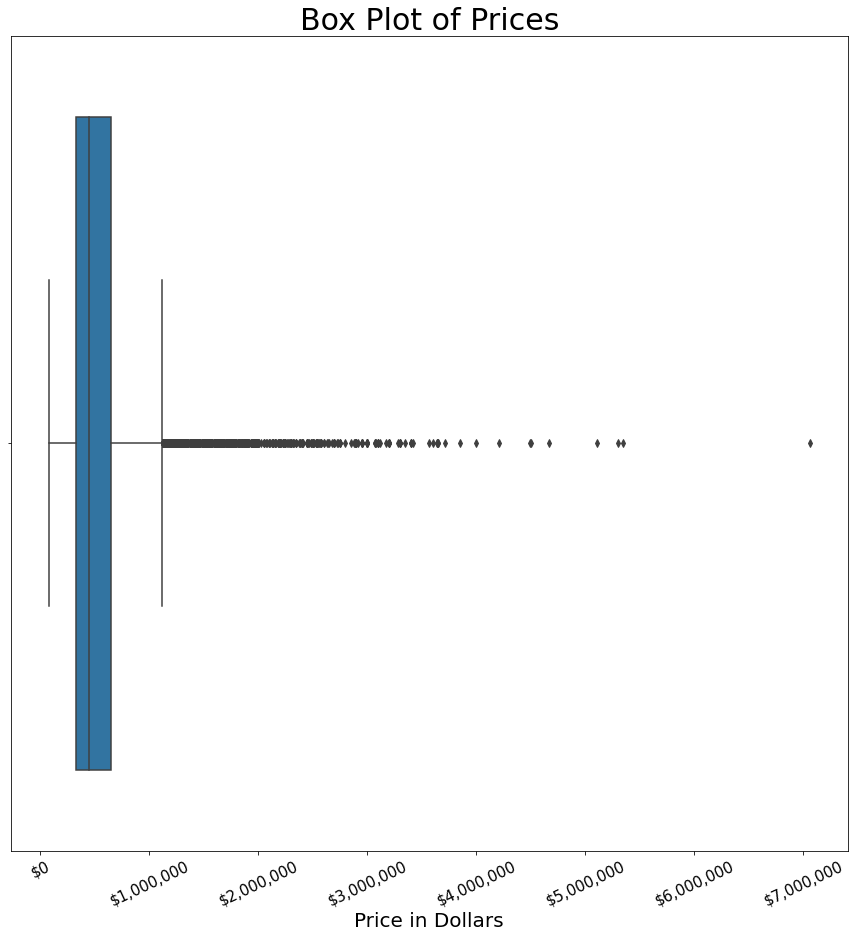

In [30]:
# boxplot of price
# thinking about getting rid of the outlier

fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(x= df_clean["price"])

ax.set_title("Box Plot of Prices", fontsize = 30)
ax.set_xlabel("Price in Dollars", fontsize = 20)

plt.ticklabel_format(style = 'plain', axis = 'x')

plt.xticks(rotation = 25, fontsize = 15)

ax.get_xaxis().set_major_formatter(ticker.FuncFormatter((lambda x, pos: '${:,.0f}'.format(x))))

plt.show()



In [31]:
# Got this from Xiaohua Su, Luke Dowker, Jawwad Siddiqui
# Finding cut-off point: `price` IQR with mean price

q3, q1 = np.percentile(df_clean['price'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit = df_clean['price'].mean()- (iqr*1.5)

upper_limit = df_clean['price'].mean()+ (iqr*1.5)

lower_limit, upper_limit

(60289.17704289255, 1020439.1770428926)

In [32]:
# Limit the range of the pricing to the mean 75% quartile range

df_clean = df_clean[df_clean['price'] < upper_limit]

In [33]:
# Sanity check

df_clean.sort_values('price', ascending = False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
3543,1020000.00,4,2.50,2700,4590,2.00,3,8,2700,2002,98103,47.67,-122.33,2080,3570
14957,1020000.00,4,3.00,2720,4800,1.50,5,8,1790,1928,98105,47.66,-122.28,2260,4800
11001,1020000.00,6,2.25,2550,5000,2.00,4,7,2550,1907,98117,47.68,-122.40,1480,5000
5651,1020000.00,4,1.75,2600,41041,1.50,4,8,2600,1965,98033,47.66,-122.17,2750,37318
2406,1020000.00,3,3.50,2880,11340,1.00,3,8,1690,1980,98074,47.61,-122.06,2530,11340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,84000.00,2,1.00,700,20130,1.00,3,6,700,1949,98168,47.48,-122.27,1490,18630
18453,83000.00,2,1.00,900,8580,1.00,3,5,900,1918,98168,47.47,-122.27,2060,6533
2139,82500.00,2,1.00,520,22334,1.00,2,5,520,1951,98168,47.48,-122.30,1572,10570
16184,81000.00,2,1.00,730,9975,1.00,1,5,730,1943,98168,47.48,-122.31,860,9000


In [34]:
# Looking at statistical data

df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00
mean,470805.05,3.33,2.04,1961.98,14552.01,1.47,3.41,7.52,1698.21,1970.88,98078.52,47.56,-122.21,1911.93,12393.42
std,197297.56,0.90,0.70,756.39,40152.91,0.54,0.65,1.01,712.77,29.13,53.27,0.14,0.14,602.14,26501.05
min,78000.00,1.00,0.50,370.00,520.00,1.00,1.00,5.00,370.00,1900.00,98001.00,47.16,-122.52,399.00,651.00
25%,315000.00,3.00,1.50,1400.00,5000.00,1.00,3.00,7.00,1170.00,1952.00,98033.00,47.46,-122.33,1470.00,5040.00
50%,435000.00,3.00,2.00,1850.00,7500.00,1.00,3.00,7.00,1510.00,1974.00,98065.00,47.57,-122.23,1800.00,7523.00
75%,598000.00,4.00,2.50,2420.00,10260.00,2.00,4.00,8.00,2090.00,1996.00,98118.00,47.68,-122.12,2260.00,9840.00
max,1020000.00,33.00,7.50,7480.00,1651359.00,3.50,5.00,12.00,5710.00,2015.00,98199.00,47.78,-121.31,4950.00,871200.00


- There still seems to be a huge outlier of 33 bedrooms in the data set possible removal candidate because of size

In [35]:
# Checking bedroom counts

df_clean["bedrooms"].value_counts()

3     9440
4     6137
2     2691
5     1277
6      212
1      177
7       30
8        9
9        4
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [36]:
# 11 seems like a reasonable number of room according to data but 33 is an outlier will remove

df_clean = df_clean.loc[df_clean['bedrooms'] != 33]

In [37]:
# Sanity Check

df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639
2,180000.00,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509
21593,400000.00,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200
21594,402101.00,2,0.75,1020,1350,2.00,3,7,1020,2009,98144,47.59,-122.30,1020,2007
21595,400000.00,3,2.50,1600,2388,2.00,3,8,1600,2004,98027,47.53,-122.07,1410,1287


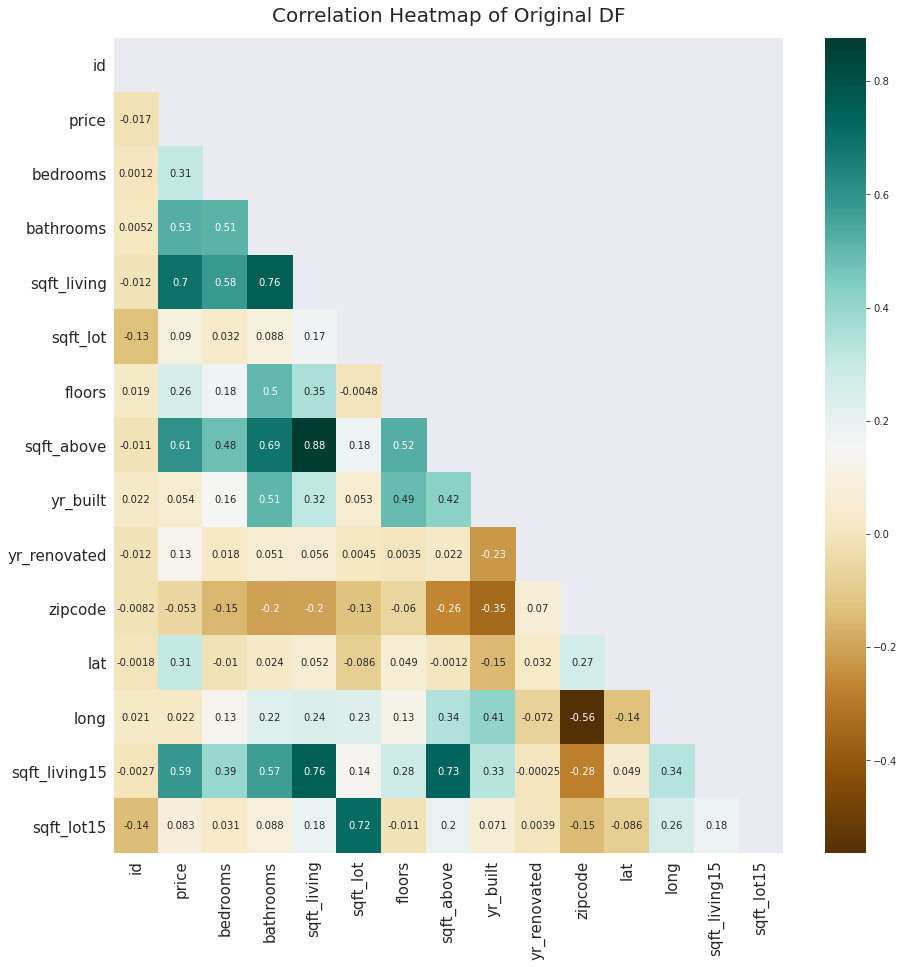

In [38]:
# original heat map with no changes

with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(15,15))
    
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    
    heatmap = sns.heatmap(df.corr(), annot=True, mask=mask, cmap='BrBG');
    
    plt.xticks( fontsize = 15)
    
    plt.yticks(fontsize = 15)
    
    heatmap.set_title('Correlation Heatmap of Original DF', fontdict={'fontsize':20}, pad=16);

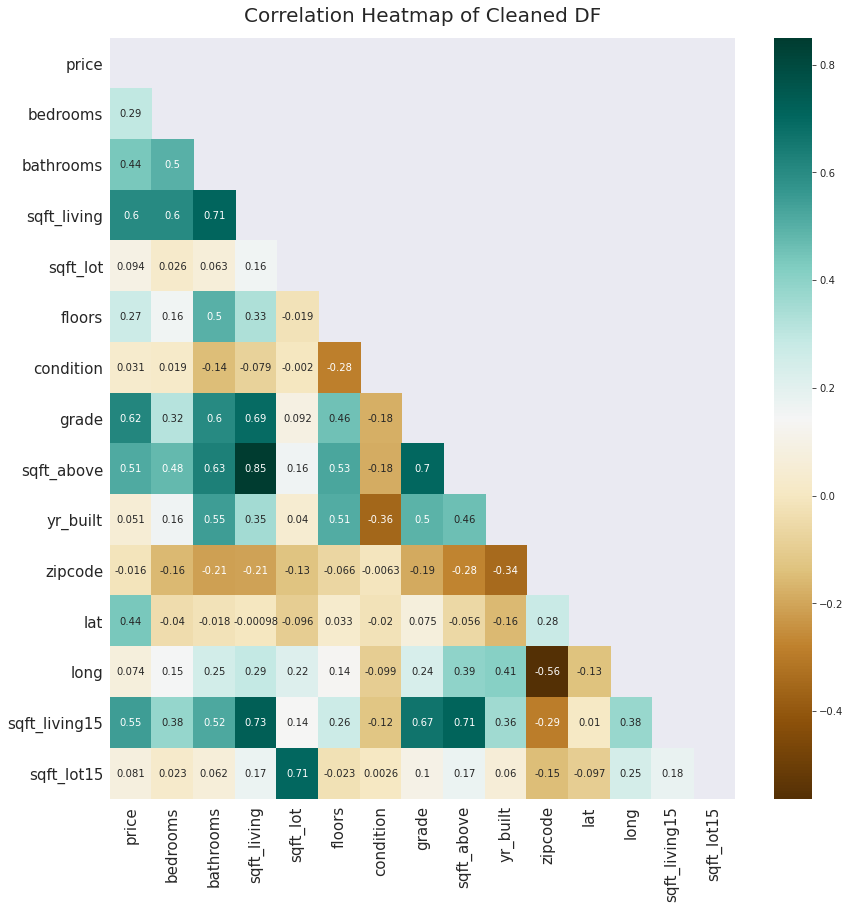

In [39]:
# new heatmap with changes

with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(14,14))
    
    mask = np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))
    
    plt.xticks( fontsize = 15)
    
    plt.yticks(fontsize = 15)
    
    heatmap = sns.heatmap(df_clean.corr(), annot=True, mask=mask, cmap = 'BrBG');
    
    heatmap.set_title('Correlation Heatmap of Cleaned DF', fontdict={'fontsize':20}, pad=16);

- Price seems to have a high correlation with **sqft_living**,  **bathrooms**, **grade**, **sqft_above**,  **lat**, **sqft_living**.  Looking at **sqft_living** there seem to be a high correlation between it, **sqft_above**, and **sqft_living15**.  This could cause multicollinearity.

In [40]:
# Showing highest correlations with price

df_clean_corr = df_clean.corr()["price"].map(abs).sort_values(ascending = False)
df_clean_corr

price           1.00
grade           0.62
sqft_living     0.60
sqft_living15   0.55
sqft_above      0.51
lat             0.44
bathrooms       0.44
bedrooms        0.29
floors          0.27
sqft_lot        0.09
sqft_lot15      0.08
long            0.07
yr_built        0.05
condition       0.03
zipcode         0.02
Name: price, dtype: float64

### Setting up a OneHotEncoder for ZipCode

*  Setting up a OneHotEncoder for ZipCode because it doesn't work well as a scalar data and it's correlation is lower than what is expected from real world knowledge, categorizing it should help aleviate this problem

In [41]:
# Resetting the index because of the previous changes in the data will effect the indexing

df_clean = df_clean.reset_index()

# Applying the OneHotEncoder and making a new dataframe

encoder = OneHotEncoder()

zipcode_trans = encoder.fit_transform(df_clean['zipcode'].values.reshape(-1,1))
zipcode_trans.todense()
encoder.get_feature_names()
zipcode_df =pd.DataFrame(zipcode_trans.todense(), columns = encoder.get_feature_names())
zipcode_df
df_ohe_clean = df_clean.join(zipcode_df)

In [42]:
# Sanity check

df_ohe_clean

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199
0,0,221900.00,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,1,538000.00,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,180000.00,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,604000.00,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,510000.00,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,21592,360000.00,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19976,21593,400000.00,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [43]:
# Dropping Index for  One Hot Encoder df and clean df

df_ohe_clean = df_ohe_clean.drop('index', axis = 1)

df_clean = df_clean.drop('index', axis = 1)

In [44]:
# Sanity check

df_ohe_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199
0,221900.00,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,538000.00,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,180000.00,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,604000.00,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,510000.00,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,360000.00,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19976,400000.00,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [45]:
# Info of df OneHotEncoder

df_ohe_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19980 non-null  float64
 1   bedrooms       19980 non-null  int64  
 2   bathrooms      19980 non-null  float64
 3   sqft_living    19980 non-null  int64  
 4   sqft_lot       19980 non-null  int64  
 5   floors         19980 non-null  float64
 6   condition      19980 non-null  int64  
 7   grade          19980 non-null  int64  
 8   sqft_above     19980 non-null  int64  
 9   yr_built       19980 non-null  int64  
 10  zipcode        19980 non-null  int64  
 11  lat            19980 non-null  float64
 12  long           19980 non-null  float64
 13  sqft_living15  19980 non-null  int64  
 14  sqft_lot15     19980 non-null  int64  
 15  x0_98001       19980 non-null  float64
 16  x0_98002       19980 non-null  float64
 17  x0_98003       19980 non-null  float64
 18  x0_980

### Regression testing

In [46]:
#  Regression Testing on original clean data set with all features

endog = df_clean["price"]
exog = sm.add_constant(df_clean.drop(['price'], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     3041.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        10:49:01   Log-Likelihood:            -2.6055e+05
No. Observations:               19980   AIC:                         5.211e+05
Df Residuals:                   19965   BIC:                         5.212e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.104e+07   1.68e+06     -6.573      0.000   -1.43e+07   -7.75e+06
bedrooms      -1.133e+04   1175.651     -9.633      0.000   -1.36e+04   -9020.953
bathrooms      2.648e+04   1932.250     13.705      0.000    2.27e+04    3.03e+04
sqft_living      73.0584      2.749     26.578      0.000      67.670      78.446
sqft_lot          0.2558      0.028      9.173      0.000       0.201       0.310
floors         3.328e+04   2119.631     15.701      0.000    2.91e+04    3.74e+04
condition      2.425e+04   1346.313     18.015      0.000    2.16e+04    2.69e+04
grade          7.242e+04   1302.237     55.616      0.000    6.99e+04     7.5e+04
sqft_above       -4.7744      2.681     -1.781      0.075     -10.030       0.481
yr_built      -1933.6536     40.830    -47.358      0.000   -2013.684   -1853.623
zipcode        -165.4013     18.992     -8.709      0.000    -202.628    -128.175
lat            5.217e+05   6026.969     86.556      0.000     5.1e+05    5.33e+05
long           -4.75e+04   7496.064     -6.337      0.000   -6.22e+04   -3.28e+04
sqft_living15    52.4443      2.152     24.369      0.000      48.226      56.663
sqft_lot15       -0.1048      0.043     -2.458      0.014      -0.188      -0.021
==============================================================================
Omnibus:                     1339.758   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2113.586
Skew:                           0.542   Prob(JB):                         0.00
Kurtosis:                       4.168   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# Regression testing same as above but removing sqft_above due to p-value being higher than alpha

endog = df_clean["price"]
exog = sm.add_constant(df_clean.drop(['price', 'sqft_above'], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     3274.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        10:49:01   Log-Likelihood:            -2.6055e+05
No. Observations:               19980   AIC:                         5.211e+05
Df Residuals:                   19966   BIC:                         5.212e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.153e+07   1.66e+06     -6.959      0.000   -1.48e+07   -8.28e+06
bedrooms      -1.136e+04   1175.579     -9.661      0.000   -1.37e+04   -9052.926
bathrooms      2.712e+04   1898.842     14.282      0.000    2.34e+04    3.08e+04
sqft_living      70.0515      2.169     32.295      0.000      65.800      74.303
sqft_lot          0.2547      0.028      9.137      0.000       0.200       0.309
floors         3.153e+04   1878.318     16.787      0.000    2.78e+04    3.52e+04
condition      2.443e+04   1342.687     18.196      0.000    2.18e+04    2.71e+04
grade          7.214e+04   1292.495     55.815      0.000    6.96e+04    7.47e+04
yr_built      -1933.9455     40.832    -47.363      0.000   -2013.980   -1853.911
zipcode        -164.2450     18.982     -8.653      0.000    -201.452    -127.038
lat            5.229e+05   5985.232     87.371      0.000    5.11e+05    5.35e+05
long          -5.011e+04   7351.936     -6.816      0.000   -6.45e+04   -3.57e+04
sqft_living15    51.8421      2.125     24.391      0.000      47.676      56.008
sqft_lot15       -0.1051      0.043     -2.464      0.014      -0.189      -0.022
==============================================================================
Omnibus:                     1337.463   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2104.621
Skew:                           0.542   Prob(JB):                         0.00
Kurtosis:                       4.164   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Regression testing with all feature of One Hot Encoder DF

endog = df_ohe_clean["price"]
exog = sm.add_constant(df_ohe_clean.drop(['price'], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1116.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        10:49:01   Log-Likelihood:            -2.5475e+05
No. Observations:               19980   AIC:                         5.097e+05
Df Residuals:                   19897   BIC:                         5.103e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -521.0654     38.813    -13.425      0.000    -597.142    -444.988
bedrooms      -5137.5519    895.420     -5.738      0.000   -6892.650   -3382.453
bathrooms      1.674e+04   1460.070     11.468      0.000    1.39e+04    1.96e+04
sqft_living      67.2963      2.085     32.281      0.000      63.210      71.382
sqft_lot          0.2995      0.021     14.266      0.000       0.258       0.341
floors         -1.33e+04   1741.892     -7.638      0.000   -1.67e+04   -9889.570
condition      2.177e+04   1035.361     21.030      0.000    1.97e+04    2.38e+04
grade          4.446e+04   1030.681     43.134      0.000    4.24e+04    4.65e+04
sqft_above       38.4059      2.099     18.297      0.000      34.292      42.520
yr_built       -673.1347     34.032    -19.779      0.000    -739.841    -606.429
zipcode        -148.2874     33.647     -4.407      0.000    -214.239     -82.336
lat            1.485e+05   3.42e+04      4.345      0.000    8.15e+04    2.15e+05
long          -7.042e+04   2.43e+04     -2.894      0.004   -1.18e+05   -2.27e+04
sqft_living15    42.0015      1.687     24.898      0.000      38.695      45.308
sqft_lot15        0.0105      0.033      0.318      0.751      -0.054       0.075
x0_98001      -1.567e+05   9382.595    -16.699      0.000   -1.75e+05   -1.38e+05
x0_98002      -1.465e+05   9694.059    -15.113      0.000   -1.66e+05   -1.28e+05
x0_98003       -1.64e+05   9960.868    -16.469      0.000   -1.84e+05   -1.45e+05
x0_98004       2.822e+05   7974.352     35.390      0.000    2.67e+05    2.98e+05
x0_98005        1.21e+05   7591.463     15.944      0.000    1.06e+05    1.36e+05
x0_98006       7.705e+04   4630.227     16.640      0.000     6.8e+04    8.61e+04
x0_98007       5.276e+04   7874.098      6.700      0.000    3.73e+04    6.82e+04
x0_98008       4.884e+04   6105.527      7.999      0.000    3.69e+04    6.08e+04
x0_98010      -5.697e+04   1.09e+04     -5.227      0.000   -7.83e+04   -3.56e+04
x0_98011        -7.9e+04   1.01e+04     -7.852      0.000   -9.87e+04   -5.93e+04
x0_98014      -7.351e+04   1.18e+04     -6.237      0.000   -9.66e+04   -5.04e+04
x0_98019      -9.936e+04   1.06e+04     -9.340      0.000    -1.2e+05   -7.85e+04
x0_98022      -1.094e+05   1.24e+04     -8.802      0.000   -1.34e+05    -8.5e+04
x0_98023      -1.841e+05   1.02e+04    -17.975      0.000   -2.04e+05   -1.64e+05
x0_98024      -1.932e+04   1.16e+04     -1.666      0.096   -4.21e+04    3412.721
x0_98027       1.498e+04   5014.975      2.986      0.003    5145.958    2.48e+04
x0_98028      -8.681e+04   9365.845     -9.269      0.000   -1.05e+05   -6.85e+04
x0_98029       5.124e+04   6128.658      8.360      0.000    3.92e+04    6.33e+04
x0_98030      -1.534e+05   7749.244    -19.800      0.000   -1.69e+05   -1.38e+05
x0_98031      -1.542e+05   6809.029    -22.654   

In [49]:
# Regression testing with all feature of One Hot Encoder DF removing sqft_lot15 because p-value of previous run above alpha

endog = df_ohe_clean["price"]
exog = sm.add_constant(df_ohe_clean.drop(['price', 'sqft_lot15'], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1129.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        10:49:01   Log-Likelihood:            -2.5475e+05
No. Observations:               19980   AIC:                         5.097e+05
Df Residuals:                   19898   BIC:                         5.103e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -520.4264     38.760    -13.427      0.000    -596.399    -444.453
bedrooms      -5147.9241    894.805     -5.753      0.000   -6901.816   -3394.033
bathrooms      1.673e+04   1459.553     11.464      0.000    1.39e+04    1.96e+04
sqft_living      67.3223      2.083     32.320      0.000      63.239      71.405
sqft_lot          0.3037      0.016     18.750      0.000       0.272       0.335
floors        -1.332e+04   1741.465     -7.646      0.000   -1.67e+04   -9902.083
condition      2.178e+04   1035.294     21.034      0.000    1.97e+04    2.38e+04
grade          4.446e+04   1030.650     43.134      0.000    4.24e+04    4.65e+04
sqft_above       38.4010      2.099     18.295      0.000      34.287      42.515
yr_built       -673.1993     34.031    -19.782      0.000    -739.903    -606.496
zipcode        -147.7163     33.598     -4.397      0.000    -213.572     -81.861
lat            1.485e+05   3.42e+04      4.345      0.000    8.15e+04    2.15e+05
long          -6.996e+04   2.43e+04     -2.880      0.004   -1.18e+05   -2.23e+04
sqft_living15    42.0314      1.684     24.955      0.000      38.730      45.333
x0_98001      -1.566e+05   9380.923    -16.696      0.000   -1.75e+05   -1.38e+05
x0_98002      -1.465e+05   9693.410    -15.111      0.000   -1.65e+05   -1.27e+05
x0_98003       -1.64e+05   9958.264    -16.466      0.000   -1.83e+05   -1.44e+05
x0_98004       2.822e+05   7974.148     35.392      0.000    2.67e+05    2.98e+05
x0_98005       1.211e+05   7590.973     15.948      0.000    1.06e+05    1.36e+05
x0_98006       7.702e+04   4629.453     16.637      0.000    6.79e+04    8.61e+04
x0_98007       5.274e+04   7873.588      6.698      0.000    3.73e+04    6.82e+04
x0_98008       4.881e+04   6104.488      7.995      0.000    3.68e+04    6.08e+04
x0_98010      -5.685e+04   1.09e+04     -5.219      0.000   -7.82e+04   -3.55e+04
x0_98011        -7.9e+04   1.01e+04     -7.853      0.000   -9.87e+04   -5.93e+04
x0_98014      -7.335e+04   1.18e+04     -6.230      0.000   -9.64e+04   -5.03e+04
x0_98019      -9.931e+04   1.06e+04     -9.336      0.000    -1.2e+05   -7.85e+04
x0_98022      -1.093e+05   1.24e+04     -8.797      0.000   -1.34e+05   -8.49e+04
x0_98023       -1.84e+05   1.02e+04    -17.973      0.000   -2.04e+05   -1.64e+05
x0_98024      -1.913e+04   1.16e+04     -1.652      0.099   -4.18e+04    3573.690
x0_98027         1.5e+04   5014.270      2.991      0.003    5171.801    2.48e+04
x0_98028       -8.68e+04   9365.566     -9.268      0.000   -1.05e+05   -6.84e+04
x0_98029       5.113e+04   6120.038      8.355      0.000    3.91e+04    6.31e+04
x0_98030      -1.534e+05   7748.915    -19.802      0.000   -1.69e+05   -1.38e+05
x0_98031      -1.543e+05   6808.578    -22.658      0.000   -1.68e+05   -1.41e+05
x0_98032      -1.699e+05   9857.639    -17.238   

In [50]:
# Running regression testing while removing possible multicollinearity attributes such sqft_above and sqft_living15

endog = df_clean["price"]
exog = sm.add_constant(df_clean.drop(['price', 'sqft_above', 
                                      'sqft_living15'], axis =1))
lin_reg_model = sm.OLS(np.log(endog), exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     3602.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        10:49:01   Log-Likelihood:                -62.796
No. Observations:               19980   AIC:                             151.6
Df Residuals:                   19967   BIC:                             254.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.8149      3.549     -2.484      0.013     -15.771      -1.858
bedrooms       -0.0195      0.003     -7.609      0.000      -0.024      -0.014
bathrooms       0.0705      0.004     17.069      0.000       0.062       0.079
sqft_living     0.0002   4.28e-06     41.869      0.000       0.000       0.000
sqft_lot     4.986e-07   6.07e-08      8.221      0.000     3.8e-07    6.18e-07
floors          0.0638      0.004     15.639      0.000       0.056       0.072
condition       0.0544      0.003     18.626      0.000       0.049       0.060
grade           0.1660      0.003     61.923      0.000       0.161       0.171
yr_built       -0.0036   8.89e-05    -40.777      0.000      -0.004      -0.003
zipcode        -0.0004   4.12e-05    -10.112      0.000      -0.000      -0.000
lat             1.3361      0.013    102.596      0.000       1.311       1.362
long           -0.0348      0.016     -2.206      0.027      -0.066      -0.004
sqft_lot15   1.788e-08   9.28e-08      0.193      0.847   -1.64e-07       2e-07
==============================================================================
Omnibus:                      350.348   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.923
Skew:                          -0.089   Prob(JB):                    7.53e-147
Kurtosis:                       3.881   Cond. No.                     2.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# Running the same as above on One Hot Encoder df

endog = df_ohe_clean["price"]
exog = sm.add_constant(df_ohe_clean.drop(['price', 'sqft_above', 
                                          'sqft_living15'], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1071.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        10:49:01   Log-Likelihood:            -2.5528e+05
No. Observations:               19980   AIC:                         5.107e+05
Df Residuals:                   19899   BIC:                         5.114e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -224.5118     38.730     -5.797      0.000    -300.425    -148.598
bedrooms    -6337.4116    918.256     -6.902      0.000   -8137.269   -4537.554
bathrooms    1.107e+04   1479.657      7.483      0.000    8171.310     1.4e+04
sqft_living   108.6064      1.557     69.776      0.000     105.556     111.657
sqft_lot        0.2910      0.022     13.506      0.000       0.249       0.333
floors       1808.6842   1552.351      1.165      0.244   -1234.054    4851.422
condition    1.815e+04   1056.644     17.172      0.000    1.61e+04    2.02e+04
grade        5.516e+04   1004.465     54.910      0.000    5.32e+04    5.71e+04
yr_built     -784.3157     34.722    -22.588      0.000    -852.374    -716.257
zipcode      -146.0891     34.534     -4.230      0.000    -213.778     -78.400
lat          1.542e+05   3.51e+04      4.394      0.000    8.54e+04    2.23e+05
long        -6.813e+04    2.5e+04     -2.728      0.006   -1.17e+05   -1.92e+04
sqft_lot15      0.0562      0.034      1.656      0.098      -0.010       0.123
x0_98001    -1.513e+05   9627.308    -15.714      0.000    -1.7e+05   -1.32e+05
x0_98002    -1.454e+05   9939.061    -14.629      0.000   -1.65e+05   -1.26e+05
x0_98003    -1.609e+05   1.02e+04    -15.740      0.000   -1.81e+05   -1.41e+05
x0_98004     2.927e+05   8174.417     35.808      0.000    2.77e+05    3.09e+05
x0_98005     1.318e+05   7786.570     16.922      0.000    1.17e+05    1.47e+05
x0_98006     8.674e+04   4735.445     18.317      0.000    7.75e+04     9.6e+04
x0_98007     5.747e+04   8084.218      7.109      0.000    4.16e+04    7.33e+04
x0_98008     5.167e+04   6268.845      8.242      0.000    3.94e+04     6.4e+04
x0_98010     -4.69e+04   1.12e+04     -4.193      0.000   -6.88e+04    -2.5e+04
x0_98011    -6.896e+04   1.03e+04     -6.678      0.000   -8.92e+04   -4.87e+04
x0_98014    -7.253e+04   1.21e+04     -5.994      0.000   -9.62e+04   -4.88e+04
x0_98019    -9.059e+04   1.09e+04     -8.295      0.000   -1.12e+05   -6.92e+04
x0_98022    -1.014e+05   1.28e+04     -7.946      0.000   -1.26e+05   -7.64e+04
x0_98023    -1.783e+05   1.05e+04    -16.957      0.000   -1.99e+05   -1.58e+05
x0_98024    -1.443e+04   1.19e+04     -1.212      0.226   -3.78e+04    8909.660
x0_98027     2.086e+04   5136.718      4.061      0.000    1.08e+04    3.09e+04
x0_98028    -8.245e+04   9616.618     -8.574      0.000   -1.01e+05   -6.36e+04
x0_98029     5.716e+04   6290.392      9.087      0.000    4.48e+04    6.95e+04
x0_98030    -1.451e+05   7950.246    -18.256      0.000   -1.61e+05    -1.3e+05
x0_98031    -1.475e+05   6987.689    -21.106      0.000   -1.61e+05   -1.34e+05
x0_98032    -1.737e+05   1.01e+04    -17.163      0.000   -1.94e+05   -1.54e+05
x0_98033     1.146e+05   6998.161     16.380      0.000    1.01e+05    1.28e+05
x0_98034    -2.563e+04   7683.993     -3.33

In [52]:
# Running the same as above on One Hot Encoder df, but including zipcode

endog = df_ohe_clean["price"]
exog = sm.add_constant(df_ohe_clean.drop(['price', 'sqft_above', 
                                          'sqft_living15', 'zipcode'], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1071.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        10:49:01   Log-Likelihood:            -2.5528e+05
No. Observations:               19980   AIC:                         5.107e+05
Df Residuals:                   19899   BIC:                         5.114e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.413e+07   3.34e+06     -4.230      0.000   -2.07e+07   -7.58e+06
bedrooms    -6337.4116    918.256     -6.902      0.000   -8137.269   -4537.554
bathrooms    1.107e+04   1479.657      7.483      0.000    8171.310     1.4e+04
sqft_living   108.6064      1.557     69.776      0.000     105.556     111.657
sqft_lot        0.2910      0.022     13.506      0.000       0.249       0.333
floors       1808.6842   1552.351      1.165      0.244   -1234.054    4851.422
condition    1.815e+04   1056.644     17.172      0.000    1.61e+04    2.02e+04
grade        5.516e+04   1004.465     54.910      0.000    5.32e+04    5.71e+04
yr_built     -784.3157     34.722    -22.588      0.000    -852.374    -716.257
lat          1.542e+05   3.51e+04      4.394      0.000    8.54e+04    2.23e+05
long        -6.813e+04    2.5e+04     -2.728      0.006   -1.17e+05   -1.92e+04
sqft_lot15      0.0562      0.034      1.656      0.098      -0.010       0.123
x0_98001    -3.419e+05   4.63e+04     -7.387      0.000   -4.33e+05   -2.51e+05
x0_98002    -3.362e+05   4.51e+04     -7.452      0.000   -4.25e+05   -2.48e+05
x0_98003    -3.519e+05   4.73e+04     -7.436      0.000   -4.45e+05   -2.59e+05
x0_98004     1.016e+05   4.89e+04      2.077      0.038    5701.523    1.98e+05
x0_98005    -5.948e+04   4.82e+04     -1.235      0.217   -1.54e+05     3.5e+04
x0_98006    -1.046e+05   4.67e+04     -2.243      0.025   -1.96e+05   -1.32e+04
x0_98007    -1.341e+05   4.77e+04     -2.810      0.005   -2.28e+05   -4.06e+04
x0_98008      -1.4e+05    4.7e+04     -2.981      0.003   -2.32e+05   -4.79e+04
x0_98010    -2.389e+05    4.1e+04     -5.827      0.000   -3.19e+05   -1.59e+05
x0_98011    -2.611e+05   5.14e+04     -5.083      0.000   -3.62e+05    -1.6e+05
x0_98014    -2.651e+05   4.33e+04     -6.123      0.000    -3.5e+05    -1.8e+05
x0_98019    -2.839e+05   4.63e+04     -6.128      0.000   -3.75e+05   -1.93e+05
x0_98022    -2.951e+05   3.92e+04     -7.528      0.000   -3.72e+05   -2.18e+05
x0_98023    -3.722e+05   4.84e+04     -7.685      0.000   -4.67e+05   -2.77e+05
x0_98024    -2.084e+05   4.26e+04     -4.893      0.000   -2.92e+05   -1.25e+05
x0_98027    -1.736e+05   4.38e+04     -3.961      0.000    -2.6e+05   -8.77e+04
x0_98028    -2.771e+05   5.21e+04     -5.313      0.000   -3.79e+05   -1.75e+05
x0_98029    -1.376e+05   4.37e+04     -3.149      0.002   -2.23e+05    -5.2e+04
x0_98030      -3.4e+05   4.51e+04     -7.537      0.000   -4.28e+05   -2.52e+05
x0_98031    -3.425e+05   4.55e+04     -7.532      0.000   -4.32e+05   -2.53e+05
x0_98032    -3.689e+05   4.75e+04     -7.762      0.000   -4.62e+05   -2.76e+05
x0_98033     -8.07e+04   4.95e+04     -1.630      0.103   -1.78e+05    1.63e+04
x0_98034    -2.211e+05   5.06e+04     -4.370      0.000    -3.2e+05   -1.22e+05
x0_98038    -2.889e+05   4.14e+04     -6.98

In [53]:
# Running resgression without zipcode because its encoded as above on One Hot Encoder df

endog = df_ohe_clean["price"]
exog = sm.add_constant(df_ohe_clean.drop(['price', 'zipcode'], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1116.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        10:49:02   Log-Likelihood:            -2.5475e+05
No. Observations:               19980   AIC:                         5.097e+05
Df Residuals:                   19897   BIC:                         5.103e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.434e+07   3.25e+06     -4.407      0.000   -2.07e+07   -7.96e+06
bedrooms      -5137.5519    895.420     -5.738      0.000   -6892.650   -3382.453
bathrooms      1.674e+04   1460.070     11.468      0.000    1.39e+04    1.96e+04
sqft_living      67.2963      2.085     32.281      0.000      63.210      71.382
sqft_lot          0.2995      0.021     14.266      0.000       0.258       0.341
floors         -1.33e+04   1741.892     -7.638      0.000   -1.67e+04   -9889.570
condition      2.177e+04   1035.361     21.030      0.000    1.97e+04    2.38e+04
grade          4.446e+04   1030.681     43.134      0.000    4.24e+04    4.65e+04
sqft_above       38.4059      2.099     18.297      0.000      34.292      42.520
yr_built       -673.1347     34.032    -19.779      0.000    -739.841    -606.429
lat            1.485e+05   3.42e+04      4.345      0.000    8.15e+04    2.15e+05
long          -7.042e+04   2.43e+04     -2.894      0.004   -1.18e+05   -2.27e+04
sqft_living15    42.0015      1.687     24.898      0.000      38.695      45.308
sqft_lot15        0.0105      0.033      0.318      0.751      -0.054       0.075
x0_98001      -3.502e+05   4.51e+04     -7.763      0.000   -4.39e+05   -2.62e+05
x0_98002      -3.402e+05    4.4e+04     -7.735      0.000   -4.26e+05   -2.54e+05
x0_98003      -3.579e+05   4.61e+04     -7.761      0.000   -4.48e+05   -2.67e+05
x0_98004       8.824e+04   4.77e+04      1.851      0.064   -5189.074    1.82e+05
x0_98005      -7.308e+04   4.69e+04     -1.557      0.119   -1.65e+05    1.89e+04
x0_98006      -1.172e+05   4.55e+04     -2.579      0.010   -2.06e+05   -2.81e+04
x0_98007      -1.417e+05   4.65e+04     -3.047      0.002   -2.33e+05   -5.05e+04
x0_98008      -1.457e+05   4.58e+04     -3.184      0.001   -2.35e+05    -5.6e+04
x0_98010      -2.518e+05      4e+04     -6.302      0.000    -3.3e+05   -1.74e+05
x0_98011       -2.74e+05      5e+04     -5.476      0.000   -3.72e+05   -1.76e+05
x0_98014       -2.69e+05   4.22e+04     -6.375      0.000   -3.52e+05   -1.86e+05
x0_98019      -2.956e+05   4.51e+04     -6.548      0.000   -3.84e+05   -2.07e+05
x0_98022       -3.06e+05   3.82e+04     -8.009      0.000   -3.81e+05   -2.31e+05
x0_98023      -3.809e+05   4.72e+04     -8.073      0.000   -4.73e+05   -2.88e+05
x0_98024      -2.163e+05   4.15e+04     -5.209      0.000   -2.98e+05   -1.35e+05
x0_98027      -1.824e+05   4.27e+04     -4.272      0.000   -2.66e+05   -9.87e+04
x0_98028      -2.843e+05   5.08e+04     -5.597      0.000   -3.84e+05   -1.85e+05
x0_98029      -1.464e+05   4.26e+04     -3.440      0.001    -2.3e+05    -6.3e+04
x0_98030      -3.513e+05    4.4e+04     -7.989      0.000   -4.37e+05   -2.65e+05
x0_98031      -3.522e+05   4.43e+04     -7.948      0.000   -4.39e+05   -2.65e+05
x0_98032      -3.681e+05   4.63e+04     -7.948   

In [54]:
# Regression testing with the three highest correlcation models not including the possible multicollinearity features

endog = df_clean["price"]
exog = sm.add_constant(df_clean.drop(['price','bedrooms', 'bathrooms', 
                                      'sqft_above', 'sqft_lot', 'floors', 
                                      'sqft_living15', 'condition', 'yr_built', 
                                     'long', 'sqft_lot15'], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     7855.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        10:49:02   Log-Likelihood:            -2.6251e+05
No. Observations:               19980   AIC:                         5.250e+05
Df Residuals:                   19975   BIC:                         5.251e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.116e+07   1.65e+06    -18.835      0.000   -3.44e+07   -2.79e+07
sqft_living    99.8818      1.609     62.058      0.000      96.727     103.037
grade        6.304e+04   1213.639     51.941      0.000    6.07e+04    6.54e+04
zipcode        36.2924     17.509      2.073      0.038       1.973      70.611
lat          5.762e+05   6463.099     89.157      0.000    5.64e+05    5.89e+05
==============================================================================
Omnibus:                     2056.801   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3173.204
Skew:                           0.765   Prob(JB):                         0.00
Kurtosis:                       4.212   Cond. No.                     1.86e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
# Regression testing with the three highest correlation model not including the possible multicollinearity features on 
# Encoder df

endog = df_ohe_clean["price"]
exog = sm.add_constant(df_ohe_clean.drop(['price','bedrooms', 'bathrooms', 
                                      'sqft_above', 'sqft_lot', 'floors', 
                                      'sqft_living15', 'condition', 'yr_built', 
                                     'long', 'sqft_lot15'], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1073.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        10:49:02   Log-Likelihood:            -2.5612e+05
No. Observations:               19980   AIC:                         5.124e+05
Df Residuals:                   19907   BIC:                         5.130e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -401.2971     34.356    -11.681      0.000    -468.638    -333.957
sqft_living   116.1788      1.209     96.128      0.000     113.810     118.548
grade        4.336e+04    929.806     46.633      0.000    4.15e+04    4.52e+04
zipcode       -67.6296     17.682     -3.825      0.000    -102.288     -32.972
lat          1.381e+05   3.65e+04      3.786      0.000    6.66e+04     2.1e+05
x0_98001    -1.597e+05   8935.023    -17.877      0.000   -1.77e+05   -1.42e+05
x0_98002    -1.486e+05   9910.972    -14.994      0.000   -1.68e+05   -1.29e+05
x0_98003    -1.607e+05   9128.304    -17.603      0.000   -1.79e+05   -1.43e+05
x0_98004     3.059e+05   8303.109     36.842      0.000     2.9e+05    3.22e+05
x0_98005      1.46e+05   8027.750     18.193      0.000     1.3e+05    1.62e+05
x0_98006     9.334e+04   4863.927     19.190      0.000    8.38e+04    1.03e+05
x0_98007      6.09e+04   8402.759      7.248      0.000    4.44e+04    7.74e+04
x0_98008     5.379e+04   6489.296      8.289      0.000    4.11e+04    6.65e+04
x0_98010    -5.528e+04   1.13e+04     -4.901      0.000   -7.74e+04   -3.32e+04
x0_98011    -7.466e+04   1.07e+04     -6.998      0.000   -9.56e+04   -5.37e+04
x0_98014    -7.967e+04   9868.413     -8.073      0.000    -9.9e+04   -6.03e+04
x0_98019    -1.149e+05   1.01e+04    -11.409      0.000   -1.35e+05   -9.52e+04
x0_98022    -9.808e+04   1.29e+04     -7.594      0.000   -1.23e+05   -7.28e+04
x0_98023    -1.778e+05   8965.929    -19.827      0.000   -1.95e+05    -1.6e+05
x0_98024     -1.34e+04   1.06e+04     -1.260      0.208   -3.42e+04    7441.498
x0_98027     1.048e+04   4607.073      2.275      0.023    1451.620    1.95e+04
x0_98028    -8.369e+04   9816.779     -8.525      0.000   -1.03e+05   -6.44e+04
x0_98029     3.034e+04   5259.664      5.769      0.000       2e+04    4.07e+04
x0_98030     -1.63e+05   8146.817    -20.013      0.000   -1.79e+05   -1.47e+05
x0_98031     -1.59e+05   7155.686    -22.225      0.000   -1.73e+05   -1.45e+05
x0_98032     -1.71e+05   9895.919    -17.276      0.000    -1.9e+05   -1.52e+05
x0_98033      1.16e+05   7270.213     15.951      0.000    1.02e+05     1.3e+05
x0_98034    -2.998e+04   7952.073     -3.770      0.000   -4.56e+04   -1.44e+04
x0_98038    -1.244e+05   7076.048    -17.574      0.000   -1.38e+05    -1.1e+05
x0_98039     4.546e+05   3.96e+04     11.481      0.000    3.77e+05    5.32e+05
x0_98040     2.458e+05   7408.993     33.178      0.000    2.31e+05     2.6e+05
x0_98042    -1.496e+05   7342.157    -20.379      0.000   -1.64e+05   -1.35e+05
x0_98045    -6.302e+04   6547.254     -9.626      0.000   -7.59e+04   -5.02e+04
x0_98052     4.988e+04   6398.236      7.797      0.000    3.73e+04    6.24e+04
x0_98053       3.8e+04   6920.837      5.491      0.000    2.44e+04    5.16e+04
x0_98055    -1.321e+05   6365.914    -20.75

### Obtaining Models through Recursive Feature Elimination

In [56]:
# Using Recursive Feature Elimination to find best 5 features df clean

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 5)
ss = StandardScaler()
ss.fit(df_clean.drop('price', axis = 1))

df_clean_scaled = ss.transform(df_clean.drop('price', axis = 1))

In [57]:
select.fit(X=df_clean_scaled, y = df_clean['price'])

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [58]:
# find out which values are true

select.support_

array([False, False,  True, False, False, False,  True, False,  True,
       False,  True, False,  True, False])

In [59]:
# Compare to table

df_clean.drop(['price'], axis = 1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650
1,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639
2,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062
3,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000
4,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509
19976,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200
19977,2,0.75,1020,1350,2.00,3,7,1020,2009,98144,47.59,-122.30,1020,2007
19978,3,2.50,1600,2388,2.00,3,8,1600,2004,98027,47.53,-122.07,1410,1287


In [60]:
# Run linear regression of rfe of df cleaned

house_preds = df_clean_scaled
house_target = df_clean['price']
lr = LinearRegression()
lr.fit(house_preds, house_target)
lr.score(house_preds, house_target)

0.680756319729743

In [61]:
# Using Recursive Feature Elimination to find best 5 features df cencoder

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 5)
ss = StandardScaler()
ss.fit(df_ohe_clean.drop('price', axis = 1))

df_ohe_clean_scaled = ss.transform(df_ohe_clean.drop('price', axis = 1))

In [62]:
select.fit(X=df_ohe_clean_scaled, y = df_ohe_clean['price'])

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [63]:
# find out which values are true

select.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False])

In [64]:
# Compare to table

df_ohe_clean.drop(['price'], axis = 1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199
0,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19976,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0

In [65]:
# Run linear regression of rfe of df cleaned

house_ohe_preds = df_ohe_clean_scaled
house_ohe_target = np.log(df_ohe_clean['price'])
lr = LinearRegression()
lr.fit(house_ohe_preds, house_ohe_target)
lr.score(house_ohe_preds, house_ohe_target)

0.827669466886995

### Finding Model through Polynomial Features

In [66]:
# Running PolynomialFeatures on df clean

pf = PolynomialFeatures(degree = 3)

X = df_clean.drop('price', axis = 1)
y = df_clean['price']

# Fitting the PolynomialFeatures object
pf.fit(X)

PolynomialFeatures(degree=3)

In [67]:
# Polynomial feature df

pdf_clean = pd.DataFrame(pf.transform(X), columns = pf.get_feature_names())
pdf_clean

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x0^2,x0 x1,x0 x2,x0 x3,x0 x4,x0 x5,x0 x6,x0 x7,x0 x8,x0 x9,x0 x10,x0 x11,x0 x12,x0 x13,x1^2,x1 x2,x1 x3,x1 x4,x1 x5,x1 x6,x1 x7,x1 x8,x1 x9,x1 x10,x1 x11,x1 x12,x1 x13,x2^2,x2 x3,x2 x4,x2 x5,x2 x6,x2 x7,x2 x8,x2 x9,x2 x10,x2 x11,x2 x12,x2 x13,x3^2,x3 x4,x3 x5,x3 x6,x3 x7,x3 x8,x3 x9,x3 x10,x3 x11,x3 x12,x3 x13,x4^2,x4 x5,x4 x6,x4 x7,x4 x8,x4 x9,x4 x10,x4 x11,x4 x12,x4 x13,x5^2,x5 x6,x5 x7,x5 x8,x5 x9,x5 x10,x5 x11,x5 x12,x5 x13,x6^2,x6 x7,x6 x8,x6 x9,x6 x10,x6 x11,x6 x12,x6 x13,x7^2,x7 x8,x7 x9,x7 x10,x7 x11,x7 x12,x7 x13,x8^2,x8 x9,x8 x10,x8 x11,x8 x12,x8 x13,x9^2,x9 x10,x9 x11,x9 x12,x9 x13,x10^2,x10 x11,x10 x12,x10 x13,x11^2,x11 x12,x11 x13,x12^2,x12 x13,x13^2,x0^3,x0^2 x1,x0^2 x2,x0^2 x3,x0^2 x4,x0^2 x5,x0^2 x6,x0^2 x7,x0^2 x8,x0^2 x9,x0^2 x10,x0^2 x11,x0^2 x12,x0^2 x13,x0 x1^2,x0 x1 x2,x0 x1 x3,x0 x1 x4,x0 x1 x5,x0 x1 x6,x0 x1 x7,x0 x1 x8,x0 x1 x9,x0 x1 x10,x0 x1 x11,x0 x1 x12,x0 x1 x13,x0 x2^2,x0 x2 x3,x0 x2 x4,x0 x2 x5,x0 x2 x6,x0 x2 x7,x0 x2 x8,x0 x2 x9,x0 x2 x10,x0 x2 x11,x0 x2 x12,x0 x2 x13,x0 x3^2,x0 x3 x4,x0 x3 x5,x0 x3 x6,x0 x3 x7,x0 x3 x8,x0 x3 x9,x0 x3 x10,x0 x3 x11,x0 x3 x12,x0 x3 x13,x0 x4^2,x0 x4 x5,x0 x4 x6,x0 x4 x7,x0 x4 x8,x0 x4 x9,x0 x4 x10,x0 x4 x11,x0 x4 x12,x0 x4 x13,x0 x5^2,x0 x5 x6,x0 x5 x7,x0 x5 x8,x0 x5 x9,x0 x5 x10,x0 x5 x11,x0 x5 x12,x0 x5 x13,x0 x6^2,x0 x6 x7,x0 x6 x8,x0 x6 x9,x0 x6 x10,x0 x6 x11,x0 x6 x12,x0 x6 x13,x0 x7^2,x0 x7 x8,x0 x7 x9,x0 x7 x10,x0 x7 x11,x0 x7 x12,x0 x7 x13,x0 x8^2,x0 x8 x9,x0 x8 x10,x0 x8 x11,x0 x8 x12,x0 x8 x13,x0 x9^2,x0 x9 x10,x0 x9 x11,x0 x9 x12,x0 x9 x13,x0 x10^2,x0 x10 x11,x0 x10 x12,x0 x10 x13,x0 x11^2,x0 x11 x12,x0 x11 x13,x0 x12^2,x0 x12 x13,x0 x13^2,x1^3,x1^2 x2,x1^2 x3,x1^2 x4,x1^2 x5,x1^2 x6,x1^2 x7,x1^2 x8,x1^2 x9,x1^2 x10,x1^2 x11,x1^2 x12,x1^2 x13,x1 x2^2,x1 x2 x3,x1 x2 x4,x1 x2 x5,x1 x2 x6,x1 x2 x7,x1 x2 x8,x1 x2 x9,x1 x2 x10,x1 x2 x11,x1 x2 x12,x1 x2 x13,x1 x3^2,x1 x3 x4,x1 x3 x5,x1 x3 x6,x1 x3 x7,x1 x3 x8,x1 x3 x9,x1 x3 x10,x1 x3 x11,x1 x3 x12,x1 x3 x13,x1 x4^2,x1 x4 x5,x1 x4 x6,x1 x4 x7,x1 x4 x8,x1 x4 x9,x1 x4 x10,x1 x4 x11,x1 x4 x12,x1 x4 x13,x1 x5^2,x1 x5 x6,x1 x5 x7,x1 x5 x8,x1 x5 x9,x1 x5 x10,x1 x5 x11,x1 x5 x12,x1 x5 x13,x1 x6^2,x1 x6 x7,x1 x6 x8,x1 x6 x9,x1 x6 x10,x1 x6 x11,x1 x6 x12,x1 x6 x13,x1 x7^2,x1 x7 x8,x1 x7 x9,x1 x7 x10,x1 x7 x11,x1 x7 x12,x1 x7 x13,x1 x8^2,x1 x8 x9,x1 x8 x10,x1 x8 x11,x1 x8 x12,x1 x8 x13,x1 x9^2,x1 x9 x10,x1 x9 x11,x1 x9 x12,x1 x9 x13,x1 x10^2,x1 x10 x11,x1 x10 x12,x1 x10 x13,x1 x11^2,x1 x11 x12,x1 x11 x13,x1 x12^2,x1 x12 x13,x1 x13^2,x2^3,x2^2 x3,x2^2 x4,x2^2 x5,x2^2 x6,x2^2 x7,x2^2 x8,x2^2 x9,x2^2 x10,x2^2 x11,x2^2 x12,x2^2 x13,x2 x3^2,x2 x3 x4,x2 x3 x5,x2 x3 x6,x2 x3 x7,x2 x3 x8,x2 x3 x9,x2 x3 x10,x2 x3 x11,x2 x3 x12,x2 x3 x13,x2 x4^2,x2 x4 x5,x2 x4 x6,x2 x4 x7,x2 x4 x8,x2 x4 x9,x2 x4 x10,x2 x4 x11,x2 x4 x12,x2 x4 x13,x2 x5^2,x2 x5 x6,x2 x5 x7,x2 x5 x8,x2 x5 x9,x2 x5 x10,x2 x5 x11,x2 x5 x12,x2 x5 x13,x2 x6^2,x2 x6 x7,x2 x6 x8,x2 x6 x9,x2 x6 x10,x2 x6 x11,x2 x6 x12,x2 x6 x13,x2 x7^2,x2 x7 x8,x2 x7 x9,x2 x7 x10,x2 x7 x11,x2 x7 x12,x2 x7 x13,x2 x8^2,x2 x8 x9,x2 x8 x10,x2 x8 x11,x2 x8 x12,x2 x8 x13,x2 x9^2,x2 x9 x10,x2 x9 x11,x2 x9 x12,x2 x9 x13,x2 x10^2,x2 x10 x11,x2 x10 x12,x2 x10 x13,x2 x11^2,x2 x11 x12,x2 x11 x13,x2 x12^2,x2 x12 x13,x2 x13^2,x3^3,x3^2 x4,x3^2 x5,x3^2 x6,x3^2 x7,x3^2 x8,x3^2 x9,x3^2 x10,x3^2 x11,x3^2 x12,x3^2 x13,x3 x4^2,x3 x4 x5,x3 x4 x6,x3 x4 x7,x3 x4 x8,x3 x4 x9,x3 x4 x10,x3 x4 x11,x3 x4 x12,x3 x4 x13,x3 x5^2,x3 x5 x6,x3 x5 x7,x3 x5 x8,x3 x5 x9,x3 x5 x10,x3 x5 x11,x3 x5 x12,x3 x5 x13,x3 x6^2,x3 x6 x7,x3 x6 x8,x3 x6 x9,x3 x6 x10,x3 x6 x11,x3 x6 x12,x3 x6 x13,x3 x7^2,x3 x7 x8,x3 x7 x9,x3 x7 x10,x3 x7 x11,x3 x7 x12,x3 x7 x13,x3 x8^2,x3 x8 x9,x3 x8 x10,x3 x8 x11,x3 x8 x12,x3 x8 x13,x3 x9^2,x3 x9 x10,x3 x9 x11,x3 x9 x12,x3 x9 x13,x3 x10^2,x3 x10 x11,x3 x10 x12,x3 x10 x13,x3 x11^2,x3 x11 x12,x3 x11 x13,x3 x12^2,x3 x12 x13,x3 x13^2,x4^3,x4^2 x5,x4^2 x6,x4^2 x7,x4^2 x8,x4^2 x9,x4^2 x10,x4^2 x11,x4^2 x12,x4^2 x13,x4 x5^2,x4 x5 x6,x4 x5 x7,x4 x5 x8,x4 x5 x9,x4

In [68]:
pdf_clean.shape

(19980, 680)

In [69]:
lr = LinearRegression()

lr.fit(pdf_clean, y)

LinearRegression()

In [70]:
# R^2 Score

lr.score(pdf_clean, y)

0.7609681176431504

In [71]:
# Linear regression

endog = df_clean["price"]
exog = pdf_clean
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     213.8
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        10:49:06   Log-Likelihood:            -2.5748e+05
No. Observations:               19980   AIC:                         5.156e+05
Df Residuals:                   19679   BIC:                         5.179e+05
Df Model:                         300                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
1              -0.0353      0.001    -34.377      0.000      -0.037      -0.033
x0              1.0611      0.167      6.337      0.000       0.733       1.389
x1              0.2991      0.039      7.604      0.000       0.222       0.376
x2             -0.0794      0.014     -5.843      0.000      -0.106      -0.053
x3             -0.1354      0.021     -6.586      0.000      -0.176      -0.095
x4             -0.0048      0.006     -0.754      0.451      -0.017       0.008
x5              0.1809      0.025      7.267      0.000       0.132       0.230
x6              0.1389      0.020      6.935      0.000       0.100       0.178
x7             -0.1057      0.015     -7.204      0.000      -0.134      -0.077
x8             -0.0127      0.003     -4.198      0.000      -0.019      -0.007
x9             -0.0056      0.002     -2.536      0.011      -0.010      -0.001
x10            -0.0041      0.001     -5.936      0.000      -0.005      -0.003
x11            -0.0059      0.001     -5.531      0.000      -0.008      -0.004
x12             0.0016      0.000      4.847      0.000       0.001       0.002
x13             0.0008      0.000      2.986      0.003       0.000       0.001
x0^2           -0.0033      0.000     -7.034      0.000      -0.004      -0.002
x0 x1           0.0002      0.000      0.985      0.325      -0.000       0.001
x0 x2           0.5776      0.081      7.128      0.000       0.419       0.736
x0 x3           3.5443      0.504      7.038      0.000       2.557       4.531
x0 x4           0.0012      0.000      6.241      0.000       0.001       0.002
x0 x5           0.0006      0.000      2.416      0.016       0.000       0.001
x0 x6           0.0028      0.000      6.109      0.000       0.002       0.004
x0 x7           0.4456      0.063      7.125      0.000       0.323       0.568
x0 x8           0.5387      0.075      7.144      0.000       0.391       0.687
x0 x9          26.8154      3.755      7.142      0.000      19.456      34.175
x0 x10          0.0143      0.002      7.075      0.000       0.010       0.018
x0 x11         -0.0318      0.004     -7.151      0.000      -0.041      -0.023
x0 x12          0.5052      0.070      7.213      0.000       0.368       0.642
x0 x13          2.8771      0.392      7.349      0.000       2.110       3.644
x1^2            0.0002      0.000      0.996      0.319      -0.000       0.000
x1 x2           0.0167      0.019      0.903      0.367      -0.020       0.053
x1 x3          -0.1204      0.123     -0.978      0.328      -0.362       0.121
x1 x4           0.0002   5.76e-05      4.291      0.000       0.000       0.000
x1 x5           0.0005   6.41e-05      7.623      0.000       0.000       0.001
x1 x6          -0.0001   5.77e-05     -2.061      0.039      -0.000   -5.82e-06
x1 x7           0.0087      0.016      0.53

- Will not run Polynomial features on df encoder because don't have the memory to run the function on so many columns

## Modeling

### Created a function for evaluating models

In [72]:
# Test Function for relevant information for train and test models
# 25% of code taken from Xiaohua Su, jawwad Siddiqui, and Luke Dowker
# 25% of code taken from Hanis Zulmuthi, Greg Burgess, Kyle Weesner

def scoring(x,y):
    
    # Running a linear regression to get R^2 score in two ways and the RMSE
    lr = LinearRegression()
    lr.fit(x,y)
    y_pred = lr.predict(x)
    result = lr.score(x,y)
    result1 = r2_score(y,y_pred)
    rmse = mean_squared_error(y,y_pred, squared = False)
    
    
    #  Running the train-test validation 
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)
    lr.fit(X_train,y_train)
    
    yhat_train = lr.predict(X_train)
    train_rmse = mean_squared_error(y_train, yhat_train, squared = False)
    
    yhat_test = lr.predict(X_test)
    test_rmse = mean_squared_error(y_test, yhat_test, squared = False)
    
    residuals_train = y_train - yhat_train
    
    residuals_test = y_test - yhat_test
    
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    
    # Running the Cross Validation
    scores_simple = cross_validate(
                    lr, X_train, y_train, cv=5, 
                    return_train_score=True)
    
    cross_validate_train = np.mean(scores_simple['train_score']), np.std(scores_simple['train_score'])
        
    cross_validate_test = np.mean(scores_simple['test_score']), np.std(scores_simple['test_score'])
    
    # Running the Shuffle Split Validation
    splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
    baseline_scores = cross_validate(
                            estimator=lr,
                            X=X_train,
                            y=y_train,
                            return_train_score=True,
                            cv=splitter)
      
    shuffle_train = baseline_scores["train_score"].mean()
    shuffle_test = baseline_scores['test_score'].mean()
    
    print("Model train score is:", result) 
    print("Train r2_score is:", result1)
    print("The train RMSE is:" , rmse)
    print("The train-test train score is:" , train_score)
    print("The train-test test score is:" , test_score)
    print("The cross validation mean train and std score is:" , cross_validate_train)
    print("The cross validation mean test and std score is:" , cross_validate_test)
    print("The shuffle split mean train score is:" , shuffle_train)
    print("The shuffle split mean test score is:", shuffle_test)
    
    return yhat_train, residuals_train, yhat_test, residuals_test

In [73]:
def plot_qq_norm(yhat_train, resids_train, yhat_test, resids_test):
    
    fig, ax= plt.subplots(2,1)
    sm.qqplot(resids_train, line = 'r',ax=ax[0]);
    sns.histplot(resids_train, stat='density', label='residuals',ax=ax[1])
    plt.show()
    return

def plot_skedacity (yhat_train, resids_train, yhat_test, resids_test):
    plt.scatter(yhat_train, resids_train)

    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.show();
    return 

In [74]:
# testing will delete

y = df_ohe_clean.price
X = df_ohe_clean.drop('price', axis = 1)

yhat_train, residuals_train, yhat_test, residuals_test = scoring(X,y)

Model train score is: 0.8213482442824492
Train r2_score is: 0.8213482442824492
The train RMSE is: 83390.64979556263
The train-test train score is: 0.820662989994505
The train-test test score is: 0.8223052436581175
The cross validation mean train and std score is: (0.8208918829671029, 0.0017724763570335852)
The cross validation mean test and std score is: (0.8183411268896219, 0.006969154955796542)
The shuffle split mean train score is: 0.8217970263102962
The shuffle split mean test score is: 0.8153074734058402


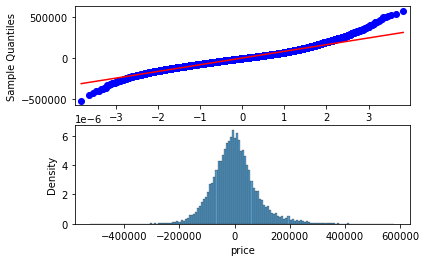

In [75]:
plot_qq_norm(yhat_train,residuals_train, yhat_test, residuals_test)

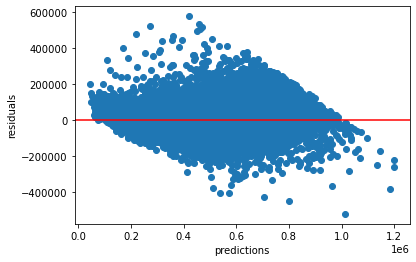

In [76]:
plot_skedacity(yhat_train,residuals_train, yhat_test, residuals_test)

### Train-Test Split

Running the test on the three highest r^2 models of df encoder all variables,  df encoder Recursive Feature Elimination, 
the Polynomial on the df clean

### Training-Test for df OneHotEncoder

In [77]:
y = df_ohe_clean.price
X = df_ohe_clean.drop('price', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.25,
                                                    random_state=42
)

In [78]:
# fit the model on the training set

lr.fit(X_train, y_train)

LinearRegression()

In [79]:
# Check the R^2 of the training data

lr.score(X_train, y_train)

0.820662989994505

In [80]:
# Check the R^2 of the test data 

lr.score(X_test, y_test)

0.8223052436581175

In [81]:
#Getting the Root Mean Squared Error

# Calculate error
y_hat = lr.predict(X)
sse = sum((y-y_hat)**2)
mse = sse/len(y)
rmse = np.sqrt(mse)

# Compare with sklearn
print(rmse)
print(np.sqrt(mean_squared_error(y, y_hat)))

83449.8058011752
83449.80580117519


In [82]:
#Running a cross validation test

model_simple = LinearRegression()
scores_simple = cross_validate(
                    model_simple, X_train, y_train, cv=5, 
                    return_train_score=True
)
print(f"""train scores: {scores_simple['train_score']},
      test scores: {scores_simple['test_score']}""")

train scores: [0.82244945 0.8175295  0.82225395 0.82100494 0.82122158],
      test scores: [0.81235912 0.83145806 0.81253949 0.81815371 0.81719525]


In [83]:
# Mean train r_2
np.mean(scores_simple['train_score']), np.std(scores_simple['train_score'])

(0.8208918829671029, 0.0017724763570335852)

In [84]:
# Mean test r_2
np.mean(scores_simple['test_score']), np.std(scores_simple['test_score'])


(0.8183411268896219, 0.006969154955796542)

In [85]:
# Fit on all the training data
model_simple.fit(X_train, y_train)
model_simple.score(X_train, y_train)

0.820662989994505

In [86]:
# Test Score

lr.score(X_test, y_test)

0.8223052436581175

In [87]:
#Shuffle Split Validation

baseline_model = LinearRegression()


splitter = ShuffleSplit(n_splits=3, test_size=0.20, random_state=42)
baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print(baseline_scores)

{'fit_time': array([0.03191423, 0.02094436, 0.01994681]), 'score_time': array([0.00299191, 0.00299168, 0.00299191]), 'test_score': array([0.81955854, 0.80739754, 0.82519649]), 'train_score': array([0.82039719, 0.82349767, 0.81903882])}


In [88]:
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.8209778958169052
Validation score: 0.817384190256632


In [89]:
baseline_model.fit(X,y)

y_pred = baseline_model.predict(X)

resids = y - y_pred

resids = y

In [90]:
bins = int(len(X)**.5)
bins

141

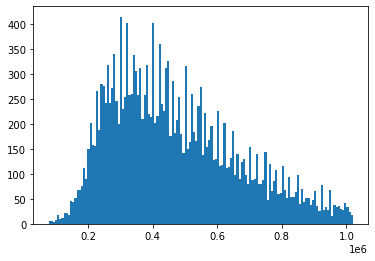

In [91]:
plt.hist(resids, bins= bins)
plt.show()

### Training-Test for Recursive Feature Elimination on df OneHotEncoder

In [92]:
#  Recursive Feature Elimination train-test split

y = np.log(house_ohe_target)
X = house_ohe_preds

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.25,
                                                    random_state=42
)

In [93]:
# fit the model on the training set

lr.fit(X_train, y_train)

LinearRegression()

In [94]:
# Check the R^2 of the training data

lr.score(X_train, y_train)

0.8241566126390186

In [95]:
# Check the R^2 of the test data 

lr.score(X_test, y_test)

0.8227851055755648

In [96]:
#Finding the RMSE

# Calculate error
y_hat = lr.predict(X)
sse = sum((y-y_hat)**2)
mse = sse/len(y)
rmse = np.sqrt(mse)

# Compare with sklearn
print(rmse)
print(np.sqrt(mean_squared_error(y, y_hat)))

0.014037106304143468
0.014037106304143445


In [97]:
# Cross validating model

model_simple = LinearRegression()
scores_simple = cross_validate(
                    model_simple, X_train, y_train, cv=5, 
                    return_train_score=True
)
print(f"""train scores: {scores_simple['train_score']},
      test scores: {scores_simple['test_score']}""")

train scores: [0.82597735 0.82074329 0.82675977 0.82435455 0.82415347],
      test scores: [0.81547546 0.83615685 0.81164243 0.82225624 0.8229096 ]


In [98]:
# Mean train r_2
np.mean(scores_simple['train_score']), np.std(scores_simple['train_score'])

(0.8243976862856837, 0.002073203251977093)

In [99]:
# Mean test r_2
np.mean(scores_simple['test_score']), np.std(scores_simple['test_score'])


(0.8216881164233053, 0.00837462900181589)

In [100]:
# Fit on all the training data

model_simple.fit(X_train, y_train)
model_simple.score(X_train, y_train)

0.8241566126390186

In [101]:
# Test score

lr.score(X_test, y_test)

0.8227851055755648

In [102]:
#Shuffle Split Validation on RFE

baseline_model = LinearRegression()


splitter = ShuffleSplit(n_splits=3, test_size=0.20, random_state=42)
baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print(baseline_scores)

{'fit_time': array([0.03993297, 0.01795197, 0.01795197]), 'score_time': array([0.        , 0.00099802, 0.        ]), 'test_score': array([0.82179783, 0.82049769, 0.82223355]), 'train_score': array([0.82421201, 0.82465478, 0.82422804])}


In [103]:
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.824364942288979
Validation score: 0.8215096906322855


### Training-Test for df Clean Polynomial Features

In [104]:
# Polynomial Feature on df Clean Model

y = np.log(df_clean.price)
X = pdf_clean

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.25,
                                                    random_state=42
)

In [105]:
# fit the model on the training set

lr.fit(X_train, y_train)

LinearRegression()

In [106]:
# Check the R^2 of the training data

lr.score(X_train, y_train)

0.7646681857525579

In [107]:
# Check the R^2 of the test data 

lr.score(X_test, y_test)

0.30944961677411964

In [108]:
#Finding RMSE

# Calculate error
y_hat = lr.predict(X)
sse = sum((y-y_hat)**2)
mse = sse/len(y)
rmse = np.sqrt(mse)

# Compare with sklearn
print(rmse)
print(np.sqrt(mean_squared_error(y, y_hat)))

0.25513128703405125
0.2551312870340515


In [109]:
# Cross validation

model_simple = LinearRegression()
scores_simple = cross_validate(
                    model_simple, X_train, y_train, cv=5, 
                    return_train_score=True
)
print(f"""train scores: {scores_simple['train_score']},
      test scores: {scores_simple['test_score']}""")

train scores: [0.76631392 0.7839278  0.78432966 0.77912454 0.78165018],
      test scores: [-4.09580091 -4.39502232  0.68902404  0.66705841  0.2605641 ]


In [110]:
# Mean train r_2
np.mean(scores_simple['train_score']), np.std(scores_simple['train_score'])

(0.7790692193621797, 0.006642892941185235)

In [111]:
# Mean test r_2
np.mean(scores_simple['test_score']), np.std(scores_simple['test_score'])


(-1.3748353380249791, 2.350683303514617)

In [112]:
# Fit on all the training data

model_simple.fit(X_train, y_train)
model_simple.score(X_train, y_train)

0.7646681857525579

In [113]:
#Test Score

lr.score(X_test, y_test)

0.30944961677411964

In [114]:
# Shuffle Split validation

baseline_model = LinearRegression()


splitter = ShuffleSplit(n_splits=3, test_size=0.20, random_state=42)
baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print(baseline_scores)

{'fit_time': array([0.34707069, 0.3570447 , 0.33310866]), 'score_time': array([0.00698304, 0.00698161, 0.0069828 ]), 'test_score': array([-3.65481381, -0.17354854, -2.46239271]), 'train_score': array([0.77699017, 0.76742983, 0.76287008])}


In [115]:
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.7690966925134544
Validation score: -2.096918353083898


In [116]:
y = df_clean.price

(array([ 331., 2585., 4149., 3699., 2897., 2330., 1598., 1176.,  761.,
         454.]),
 array([  78000.,  172200.,  266400.,  360600.,  454800.,  549000.,
         643200.,  737400.,  831600.,  925800., 1020000.]),
 <BarContainer object of 10 artists>)

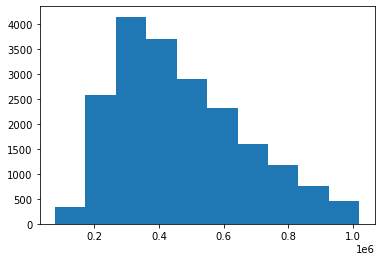

In [117]:
fig, ax = plt.subplots()

ax.hist(y)

(array([  21.,   60.,  209.,  888., 2443., 3513., 4216., 3950., 2978.,
        1702.]),
 array([11.26446411, 11.52154901, 11.77863392, 12.03571883, 12.29280374,
        12.54988865, 12.80697355, 13.06405846, 13.32114337, 13.57822828,
        13.83531319]),
 <BarContainer object of 10 artists>)

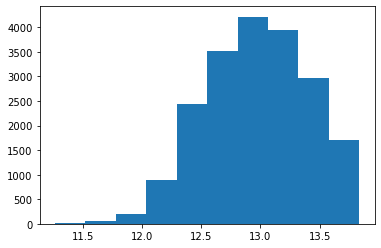

In [118]:
y2= np.log(df_clean.price)
fig, ax = plt.subplots()

ax.hist(y2)

In [119]:
df_clean_grade = df_clean.groupby(by = 'grade').mean().reset_index()

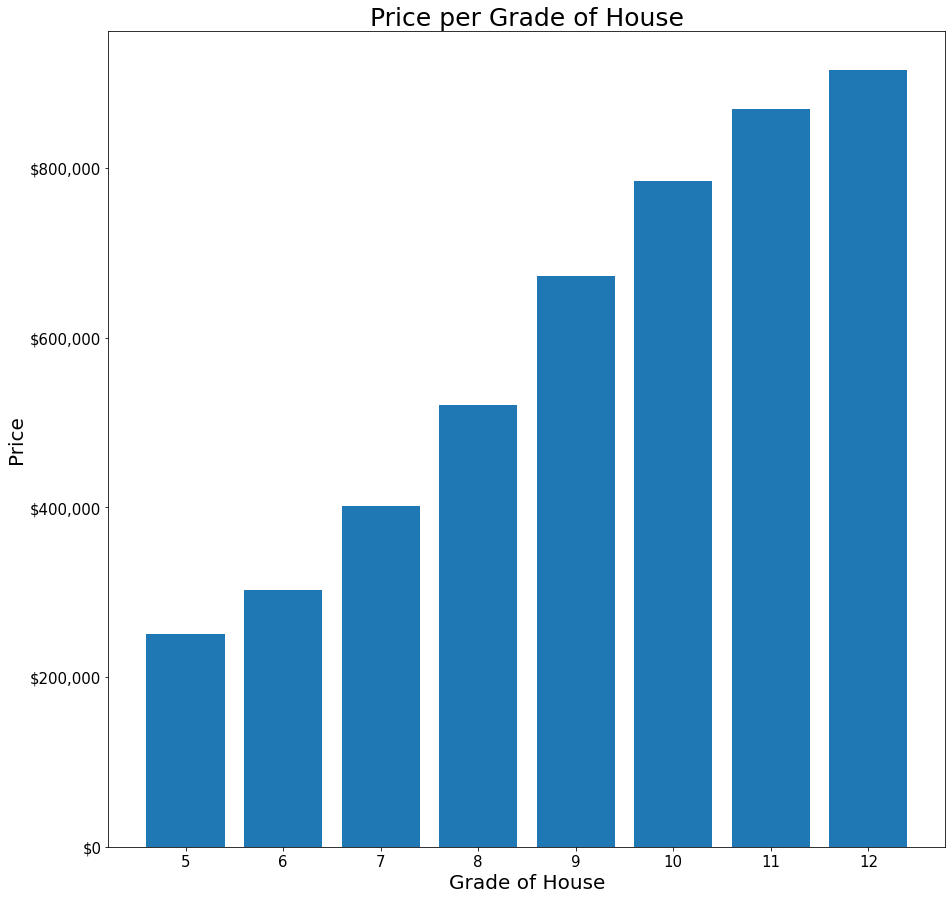

In [120]:
fig, ax = plt.subplots(figsize = (15,15))

x = df_clean_grade.grade
y = df_clean_grade.price

ax.bar(x,y)
ax.set_xlabel("Grade of House", fontsize = 20)
ax.set_ylabel("Price", fontsize = 20)
ax.set_title("Price per Grade of House", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter((lambda x, pos: '${:,.0f}'.format(x))))

plt.savefig("Images/PriceperGradeHouse.png", bbox_inches = "tight")

plt.show()

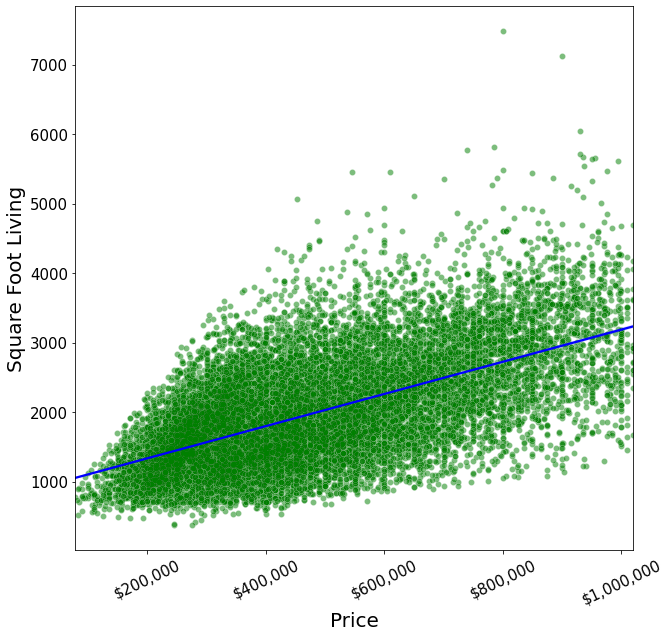

In [121]:
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x = "price", y = 'sqft_living',
               data  = df_clean, color = 'green', alpha = .5)

sns.regplot(x = "price", y ='sqft_living', data =df_clean, 
           scatter_kws = {"color" : "green", "alpha" : .02}, line_kws = {"color": "blue"})

ax.set_xlabel("Price", fontsize = 20)
ax.set_ylabel("Square Foot Living", fontsize = 20)
plt.ticklabel_format(style = 'plain', axis = 'x')

plt.xticks(rotation = 25, fontsize = 15)

plt.yticks(fontsize = 15)

ax.get_xaxis().set_major_formatter(ticker.FuncFormatter((lambda x, pos: '${:,.0f}'.format(x))))

plt.savefig("Images/SquareftlivingvsPrice.png", bbox_inches = 'tight')

plt.show()

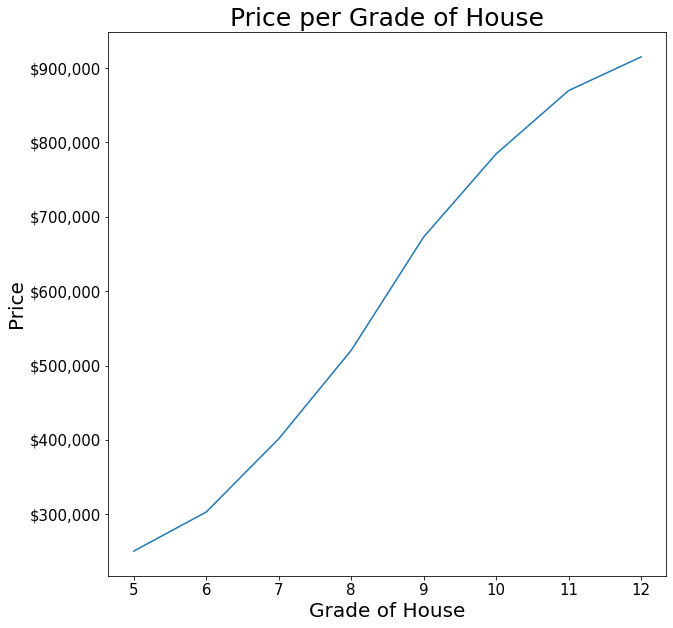

In [122]:
fig, ax = plt.subplots(figsize = (10,10))

plt.plot(df_clean_grade['grade'],df_clean_grade["price"])

ax.set_xlabel("Grade of House", fontsize = 20)
ax.set_ylabel("Price", fontsize = 20)
ax.set_title("Price per Grade of House", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter((lambda x, pos: '${:,.0f}'.format(x))))

plt.savefig("Images/PricePerGradeHouseLine.png", bbox_inches = 'tight')

plt.show()

In [123]:
df_clean_bathroom = df_clean.groupby(by = "bathrooms").mean().reset_index()

In [124]:
df_clean_bathroom

,bathrooms,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.50,237375.00,2.25,1235.00,5465.50,1.25,3.25,6.25,992.50,1948.00,98122.75,47.55,-122.28,1545.00,5844.75
1,0.75,311098.25,2.00,981.64,17031.79,1.09,3.54,6.05,895.21,1944.66,98099.45,47.55,-122.24,1450.93,17841.30
2,1.00,348390.63,2.64,1181.60,11456.58,1.11,3.46,6.58,1095.23,1944.52,98101.62,47.56,-122.27,1450.99,9885.93
3,1.25,422278.57,2.29,1360.00,4295.86,1.79,3.43,7.57,1087.14,1983.43,98105.00,47.62,-122.28,1548.57,4923.14
4,1.50,400622.63,3.04,1535.10,11024.28,1.35,3.48,7.12,1341.98,1960.39,98090.73,47.56,-122.26,1607.70,9692.95
5,1.75,444264.25,3.23,1777.82,15208.12,1.14,3.60,7.25,1399.44,1960.77,98080.48,47.56,-122.23,1783.05,13271.82
6,2.00,446852.50,3.31,1787.33,14298.97,1.29,3.58,7.22,1482.04,1961.42,98083.77,47.56,-122.23,1725.40,12075.43
7,2.25,486889.33,3.41,2043.36,14144.73,1.60,3.42,7.74,1721.27,1979.24,98065.42,47.56,-122.20,1976.81,12949.70
8,2.50,515722.83,3.55,2339.72,14442.84,1.85,3.21,8.09,2153.87,1992.17,98061.67,47.54,-122.16,2226.50,12664.87
9,2.75,587303.16,3.98,2606.66,16842.96,1.54,3.48,8.07,2120.71,1979.22,98068.73,47.56,-122.18,2308.53,14287.33


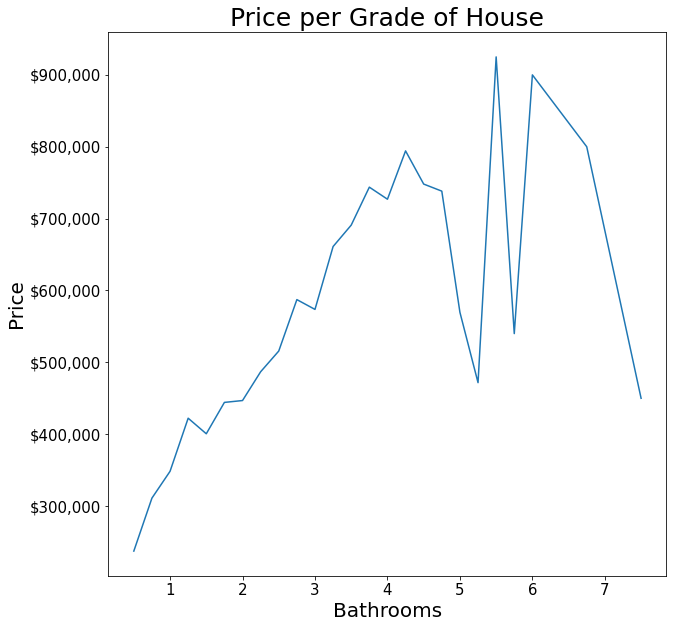

In [125]:
from fractions import Fraction

fig, ax = plt.subplots(figsize = (10,10))

x = df_clean_bathroom.bathrooms
y = df_clean_bathroom.price

plt.plot(x,y)
ax.set_xlabel("Bathrooms", fontsize = 20)
ax.set_ylabel("Price", fontsize = 20)
ax.set_title("Price per Grade of House", fontsize = 25)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


ax.get_yaxis().set_major_formatter(ticker.FuncFormatter((lambda x, pos: '${:,.0f}'.format(x))))

plt.savefig("Images/PriceperBathroom.png", bbox_inches = "tight")

plt.show()

In [126]:
# filt = (df_clean['bathrooms'].isin([2,3,4])) & (df_clean['price'] <= 2000000) & (df_clean['sqft_living'] <=4000)
# df_clean = df_clean[filt]
# df_clean['price'] = df_clean['price']
# g=sns.lmplot(y='price', x='sqft_living', hue='bathrooms', data=df_clean, scatter=False, height = 7)
# plt.xlabel("Living space (sqft)")
# plt.ylabel("Price ($)")
# plt.title('by number of bathrooms', y=1, fontsize=10)
# plt.suptitle('Price by Living Space',y=1.03,fontsize = 18)
# # title
# new_title = 'No. of bedrooms'
# g._legend.set_title(new_title)
# # replace labels
# new_labels = ['2','3','4']
# for t, l in zip(g._legend.texts, new_labels):
#     t.set_text(l)
# plt.ticklabel_format(style='plain', axis='y');

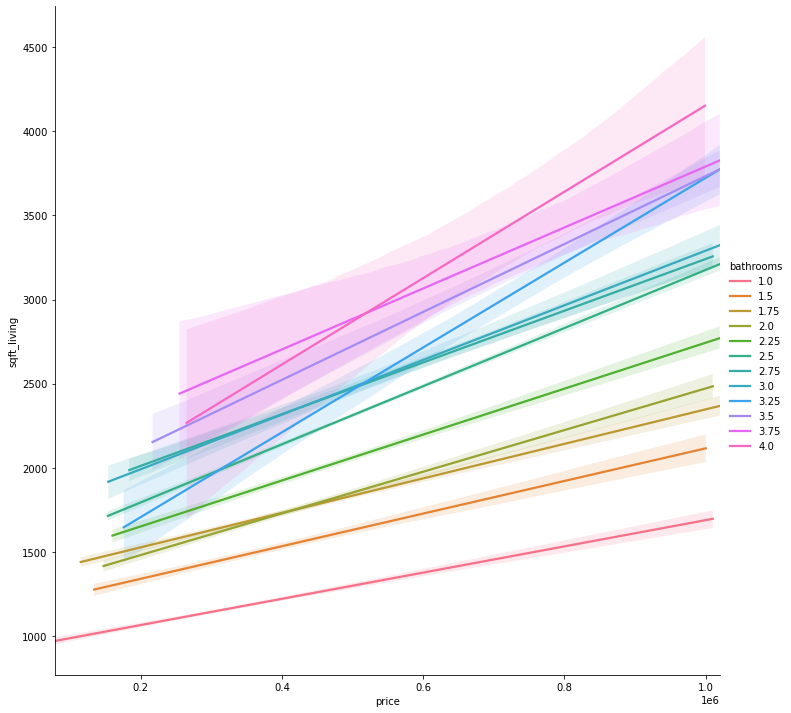

In [168]:
g = sns.lmplot(y='sqft_living', x = "price", 
               hue = "bathrooms", scatter = False, 
               data = df_clean.loc[df_clean['bathrooms'].isin(df_clean.value_counts('bathrooms',ascending = False).head(12).index)], 
               height = 10)


In [128]:
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639
2,180000.00,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,360000.00,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509
19976,400000.00,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200
19977,402101.00,2,0.75,1020,1350,2.00,3,7,1020,2009,98144,47.59,-122.30,1020,2007
19978,400000.00,3,2.50,1600,2388,2.00,3,8,1600,2004,98027,47.53,-122.07,1410,1287


In [140]:
df_clean.sort_values('bathrooms', ascending = False).head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
7932,450000.00,9,7.50,4050,6504,2.00,3,7,4050,1996,98144,47.59,-122.30,1448,3866
3730,800000.00,7,6.75,7480,41664,2.00,3,11,5080,1953,98166,47.46,-122.37,2810,33190
19470,900000.00,5,6.00,7120,40806,2.00,3,12,5480,2007,98006,47.55,-122.11,3440,36859
14591,540000.00,7,5.75,3700,7647,2.00,3,8,3700,1948,98155,47.74,-122.29,2510,7479
12896,925000.00,5,5.50,5190,12637,2.00,3,11,5190,2001,98065,47.54,-121.87,3840,12637


In [162]:
df_clean.loc[df_clean['bathrooms'].isin(df_clean.value_counts('bathrooms',ascending = False).head(7).index)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639
2,180000.00,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062
4,510000.00,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503
5,257500.00,3,2.25,1715,6819,2.00,3,7,1715,1995,98003,47.31,-122.33,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19972,610685.00,4,2.50,2520,6023,2.00,3,9,2520,2014,98056,47.51,-122.17,2520,6023
19974,475000.00,3,2.50,1310,1294,2.00,3,8,1180,2008,98116,47.58,-122.41,1330,1265
19975,360000.00,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509
19976,400000.00,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200


In [160]:
df_clean.value_counts('bathrooms',ascending = False).head(7).index

Float64Index([2.5, 1.0, 1.75, 2.25, 2.0, 1.5, 2.75], dtype='float64', name='bathrooms')

In [173]:
df.loc[(df["bathrooms"] == 1) & (df['price']> 900000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
890,1962200435,11/10/2014,1010000.00,4,1.00,1820,5400,1.50,NaN,NONE,Average,8 Good,1820,?,1923,2014.00,98102,47.65,-122.32,1820,5400
2239,7015200136,5/3/2015,1000000.00,5,1.00,2010,5210,1.50,NO,NONE,Average,9 Better,1890,120.0,1927,0.00,98119,47.65,-122.37,2330,5000
4074,3262300940,2/10/2015,940000.00,3,1.00,1220,8119,1.00,NO,NONE,Good,7 Average,1220,0.0,1955,nan,98039,47.63,-122.24,1910,8119
4787,2210500019,3/24/2015,937500.00,3,1.00,1320,8500,1.00,NO,NONE,Good,7 Average,1320,0.0,1954,nan,98039,47.62,-122.23,2790,10800
5685,1453602360,4/6/2015,1000000.00,3,1.00,1540,24500,1.50,NO,NONE,Average,7 Average,1540,0.0,1949,0.00,98125,47.72,-122.29,1540,7250
6237,5536100010,2/4/2015,1050000.00,4,1.00,1330,9729,1.00,NO,NONE,Average,6 Low Average,1330,0.0,1952,0.00,98004,47.62,-122.21,2920,10353
6748,5700001640,5/8/2014,1040000.00,4,1.00,3410,5000,2.00,NO,NONE,Very Good,8 Good,2190,1220.0,1910,0.00,98144,47.58,-122.29,2550,5000
7312,5101403915,4/3/2015,970000.00,2,1.00,1290,5376,1.00,NO,NONE,Average,6 Low Average,1290,0.0,1945,0.00,98115,47.70,-122.31,1180,5376
7469,1337801060,3/5/2015,1030000.00,3,1.00,2050,4800,2.00,NO,NONE,Average,8 Good,1950,100.0,1922,0.00,98112,47.63,-122.31,2220,4800
8330,2770604925,7/15/2014,1300000.00,5,1.00,1670,6400,1.50,NaN,NONE,Average,8 Good,1670,0.0,1919,0.00,98119,47.65,-122.37,1910,2983
